# Tarea 2 - Taller de Python para Ciencias de Datos

Nombre de la base de datos: Listado de autos usados marca Ford.  
Descripción: Este set de datos contiene información sobre el precio, la transmisión, el millaje (distancia en millas), tipo de combustible que utiliza el vehículo, el impuesto de circulación, millas por galón (consumo de bencina en galones, por milla recorrida) y el tamaño del motor de los autos guardados en la base de datos.  
Datos a trabajar: `tax`, `transmission`. `mpg`.

Importar librerías

In [64]:
import pandas as pd
import numpy as np

Importar base de datos a usar

In [65]:
df = pd.read_csv('datos_vehiculos.csv')
df.to_csv('datos_vehiculos.csv', index=False)

### Mostrar encabezados

In [66]:
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,?,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,?,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,?,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,?,61.4,1.0


### Análisis básico de los datos de entrada

Análisis estadístico de los datos

In [67]:
df.describe()

,year,price,mileage,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,10.125696,0.432367
min,1996.000000,495.000000,1.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,201.800000,5.000000


Información de los datos

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  object 
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(3), object(4)
memory usage: 1.2+ MB


### Identificación y manipulación de valores faltantes


Convertir ? en NaN

In [69]:
# Reemplazar "?" a NaN
df.replace("?", np.nan, inplace = True)
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,NaN,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,NaN,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,NaN,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,NaN,61.4,1.0


Cantidad de valores faltantes en cada columna

In [70]:
df.isnull().sum()

model            0
year             0
price            0
transmission     0
mileage          0
fuelType         0
tax             54
mpg              0
engineSize       0
dtype: int64

Manipulacion de valores faltantes: Reemplazando por su promedio.  
Como en 'tax' hay 54 datos faltantes, estos serán reemplazados por el promedio de los demás datos de esa columna.

Calcular el valor promedio de la columna `tax`.

In [71]:
tax_prom = df["tax"].astype("float").mean(axis=0)
print("El promedio de la columna tax es:", tax_prom)

El promedio de la columna tax es: 113.41793211255025


Reemplazar "NaN" con el valor promedio en la columna `tax`.

In [72]:
df["tax"].replace(np.nan, tax_prom, inplace=True)
df.head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,113.417932,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145,50.4,1.0
7,Fiesta,2017,9000,Manual,13054,Petrol,113.417932,54.3,1.2
8,Kuga,2019,25500,Automatic,6894,Diesel,145,42.2,2.0
9,Focus,2018,10000,Manual,48141,Petrol,113.417932,61.4,1.0


Corregir el formato de los datos.

In [73]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax              object
mpg             float64
engineSize      float64
dtype: object

Como la columna `tax` se encuentra en formato `object` y este formato no es apto para trabajar los datos, hay que cambiarlo.  
En este caso, se le da el formato `int` o `float`, pues se trata de una variable numérica.

In [74]:
df[["tax"]] = df[["tax"]].astype("float")
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

### Estandarizar datos de entrada

Transformar **mpg** a **km/L**:

En el conjunto de datos el consumo de combustible de la columna `mpg` están dados en la unidad de millas por galón o **mpg**. Si se está desarrollando una aplicación en un país que trabaja el consumo de combustible con el estándar de kilómetros por litros **km/L**, estos valores se deben cambiar.

Por este motivo se necesita aplicar una **transformación de datos** para convertir de **mpg** a **km/L**.

La fórmula de unidad de conversión es:

1 mpg(US) = 0.425144 km/L

In [75]:
df.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0
5,Fiesta,2015,10500,Manual,35432,Petrol,113.417932,47.9,1.6
6,Puma,2019,22500,Manual,2029,Petrol,145.000000,50.4,1.0


In [76]:
df['km/L'] = df["mpg"]*0.425144
df['km'] = df["mileage"]*1.60934

df.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24.530809,25659.31696
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24.530809,14617.63522
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24.530809,20045.93904
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17.133303,16833.69640
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20.704513,2385.04188
5,Fiesta,2015,10500,Manual,35432,Petrol,113.417932,47.9,1.6,20.364398,57022.13488
6,Puma,2019,22500,Manual,2029,Petrol,145.000000,50.4,1.0,21.427258,3265.35086


### Normalizar datos de entrada

**Objetivo**: Normalizar las variables de la columna engineSize tal que sus rangos de valores estén entre 0 y 1.

**Estrategia**: Reemplazar el valor original por (valor original)/(valor máximo).

In [77]:
df['km/LNorm'] = df['km/L']/df['km/L'].max()
df['kmNorm'] = df['km']/df['km'].max()
df.head(7)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24.530809,25659.31696,0.285927,0.089753
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24.530809,14617.63522,0.285927,0.051130
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24.530809,20045.93904,0.285927,0.070118
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17.133303,16833.69640,0.199703,0.058882
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20.704513,2385.04188,0.241328,0.008343
5,Fiesta,2015,10500,Manual,35432,Petrol,113.417932,47.9,1.6,20.364398,57022.13488,0.237364,0.199455
6,Puma,2019,22500,Manual,2029,Petrol,145.000000,50.4,1.0,21.427258,3265.35086,0.249752,0.011422


Agrupar datos de entrada

In [78]:
df["km/L"]=df["km/L"].astype(int, copy=True)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343


Graficar un histograma de `tax` para ver la forma de la distribución de los valores en la columna `tax`.

Text(0.5, 1.0, 'Contenedores km/L')

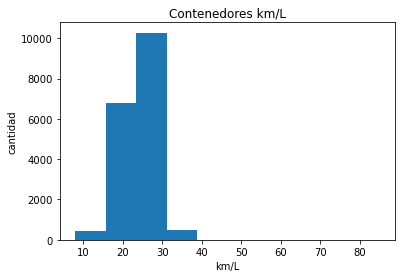

In [79]:
%matplotlib inline
import matplotlib as plt

plt.pyplot.hist(df["km/L"])

#Configurar las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("km/L")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Contenedores km/L")

Generar los contenedores usando la funcion de `numpy` (**numpy** `linspace(valor_inicial, valor_final, numero_divisiones)`).

In [80]:
contenedores = np.linspace(min(df["km/L"]), max(df["km/L"]), 4)
contenedores

array([ 8.        , 33.66666667, 59.33333333, 85.        ])

Se crea una lista con el grupo de las variables, las cuales se dividiran en bajo, mediano y alto.

In [81]:
gasto =['Bajo', 'Mediano', 'Alto']

Se utiliza la funcion `cut` para definir los valores pertenecientes a cada grupo 

In [82]:
df['gastos-en-km/L'] = pd.cut(df['km/L'], contenedores, labels=gasto, include_lowest=True )
df[['km/L','gastos-en-km/L']].tail(10)

,km/L,gastos-en-km/L
17956,20,Bajo
17957,22,Bajo
17958,20,Bajo
17959,29,Bajo
17960,23,Bajo
17961,20,Bajo
17962,24,Bajo
17963,28,Bajo
17964,24,Bajo
17965,24,Bajo


Para ver el numero de autos que hay en cada grupo de gastos en km/L, se usa el metodo `.values_counts()`

In [83]:
df['gastos-en-km/L'].value_counts() 

Bajo       17770
Mediano      191
Alto           5
Name: gastos-en-km/L, dtype: int64

Gráfico de cada distribución. 

Text(0.5, 1.0, 'Contenedores km/L')

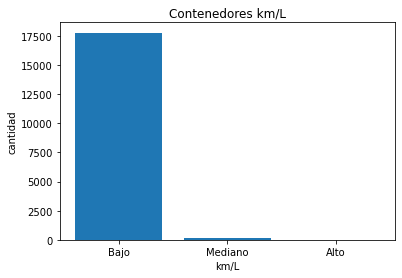

In [84]:
plt.pyplot.bar(gasto, df["gastos-en-km/L"].value_counts())

#Configurar las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("km/L")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Contenedores km/L")

In [85]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,gastos-en-km/L
0,Fiesta,2017,12000,Automatic,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753,Bajo
1,Focus,2018,14000,Manual,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130,Bajo
2,Focus,2017,13000,Manual,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118,Bajo
3,Fiesta,2019,17500,Manual,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882,Bajo
4,Fiesta,2019,16500,Automatic,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343,Bajo


Visualización de la distribución de cada contenedor.

Text(0.5, 1.0, 'Contenedores km/L')

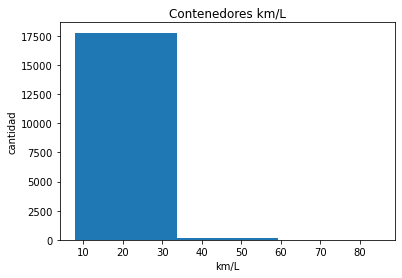

In [86]:
plt.pyplot.hist(df["km/L"], bins=3)

#Configurar las etiquetas para los ejes x e y más un título
plt.pyplot.xlabel("km/L")
plt.pyplot.ylabel("cantidad")
plt.pyplot.title("Contenedores km/L")

### Generación de variables indicadoras

Muestra las columnas del dataframe.

In [87]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'km/L', 'km', 'km/LNorm', 'kmNorm',
       'gastos-en-km/L'],
      dtype='object')

Crea `variable_dummy_1` y le asigna los valores de la columna `transmission` mediante el metodo `getdummies` para poder separarla por tipo.

In [88]:
variable_dummy_1 = pd.get_dummies(df["transmission"])
variable_dummy_1.head()

,Automatic,Manual,Semi-Auto
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


Cambio de nombre de las columnas de las distintos tipos de transmisiones del dataframe.

In [89]:
variable_dummy_1.rename(columns={'Automatic':'Transmision Automatica', 'Manual':'Transmision Manual', 'Semi-Auto':'Transmision Semi-Automatica'}, inplace=True)
variable_dummy_1.head()

,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


Se elimina la columna de `transmission` del dataframe.

In [90]:
# combinar los dataframes "df" y "variable_dummy_1" 
df = pd.concat([df, variable_dummy_1], axis=1)

# Elimina la columna original "transmission" del dataframe "df"
df.drop("transmission", axis = 1, inplace=True)

Se muestra por pantalla los primeros 5 valores del dataframe, luego de eliminar la tabla y modificar los nombres de los valores que se cambiaron.

In [91]:
df.head()

,model,year,price,mileage,fuelType,tax,mpg,engineSize,km/L,km,km/LNorm,kmNorm,gastos-en-km/L,Transmision Automatica,Transmision Manual,Transmision Semi-Automatica
0,Fiesta,2017,12000,15944,Petrol,113.417932,57.7,1.0,24,25659.31696,0.285927,0.089753,Bajo,1,0,0
1,Focus,2018,14000,9083,Petrol,150.000000,57.7,1.0,24,14617.63522,0.285927,0.051130,Bajo,0,1,0
2,Focus,2017,13000,12456,Petrol,150.000000,57.7,1.0,24,20045.93904,0.285927,0.070118,Bajo,0,1,0
3,Fiesta,2019,17500,10460,Petrol,145.000000,40.3,1.5,17,16833.69640,0.199703,0.058882,Bajo,0,1,0
4,Fiesta,2019,16500,1482,Petrol,145.000000,48.7,1.0,20,2385.04188,0.241328,0.008343,Bajo,1,0,0
